# Lab 4 - analysis of Bitcoin market price and volume of tweets about Bitcoin.

In [1]:
# !pip3 install sklearn
# !pip3 install seaborn

In [2]:
import pandas as pd
import numpy as np
import string
import statistics as stat
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

sns.set(style='whitegrid')

plt.style.use('seaborn-whitegrid')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### 1. Import dataset
https://www.kaggle.com/jaimebadiola/bitcoin-tweets-and-price?select=df_Final.csv

In [3]:
df = pd.read_csv('btc.csv', sep=';')

In [4]:
df.head()

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),Volume (Currency)
0,2017-08-01 00:00:00,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00,2825.92,184.02,"522951,00"
1,2017-08-01 01:00:00,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01,2853.38,77.3,219605.16
2,2017-08-01 02:00:00,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31,2841.60,135.83,386739.15
3,2017-08-01 03:00:00,-0.021036,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73,2862.93,143.2,408360.03
4,2017-08-01 04:00:00,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11,2874.99,222.53,637045.88


### 2. Motivation
- predict bitcoin price based on tweets
- regression

### 3. Visualize data

In [5]:
# define step variable to draw x axis description (dates)

In [6]:
step = int(len(df.index) / 20)
x_ticks = df['Date'][0:-1:step]

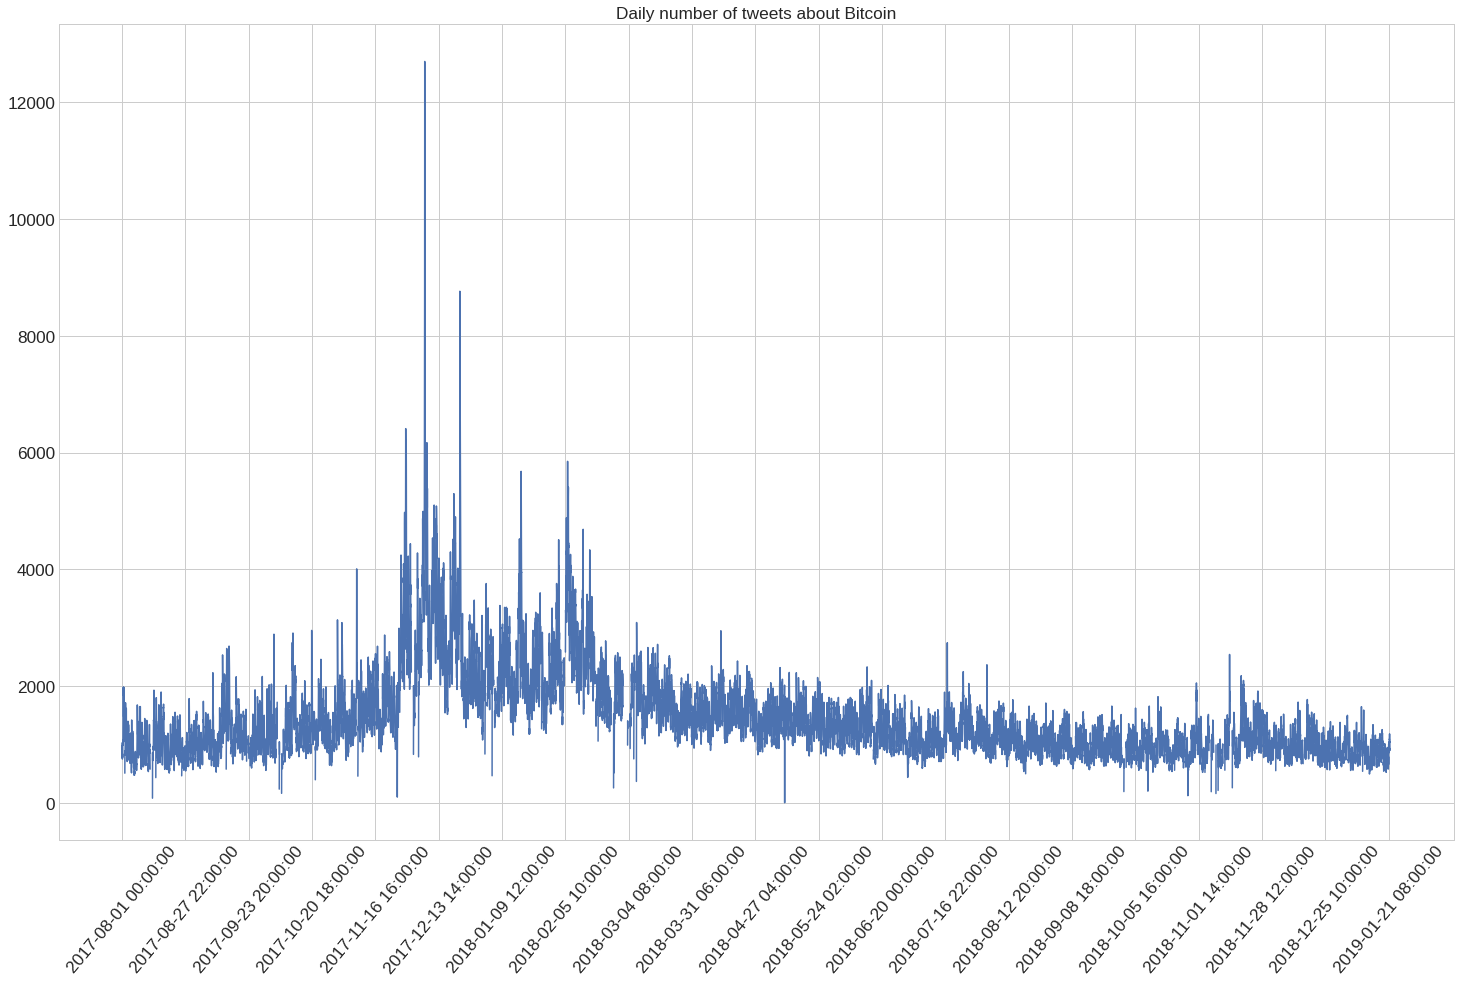

In [7]:
plt.plot(df['Date'], df['Total Volume of Tweets'])
plt.title('Daily number of tweets about Bitcoin')
plt.xticks(x_ticks, rotation=50)
plt.show()

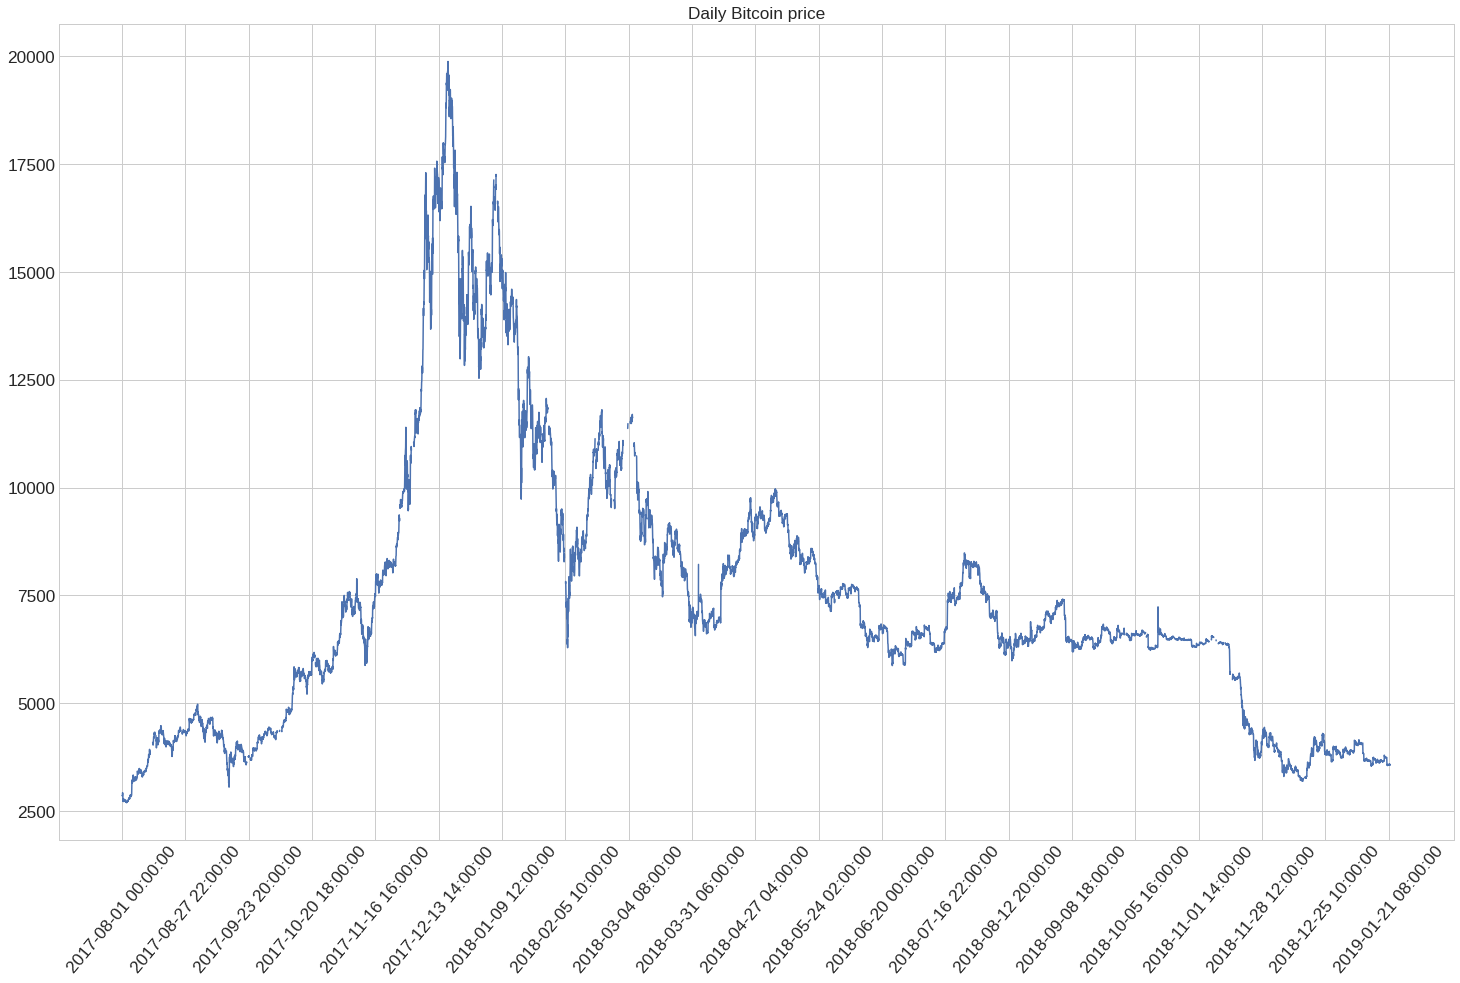

In [8]:
plt.plot(df['Date'], df['High'])
plt.title('Daily Bitcoin price')
plt.xticks(x_ticks, rotation=50)
plt.show()

#### dataset standarized

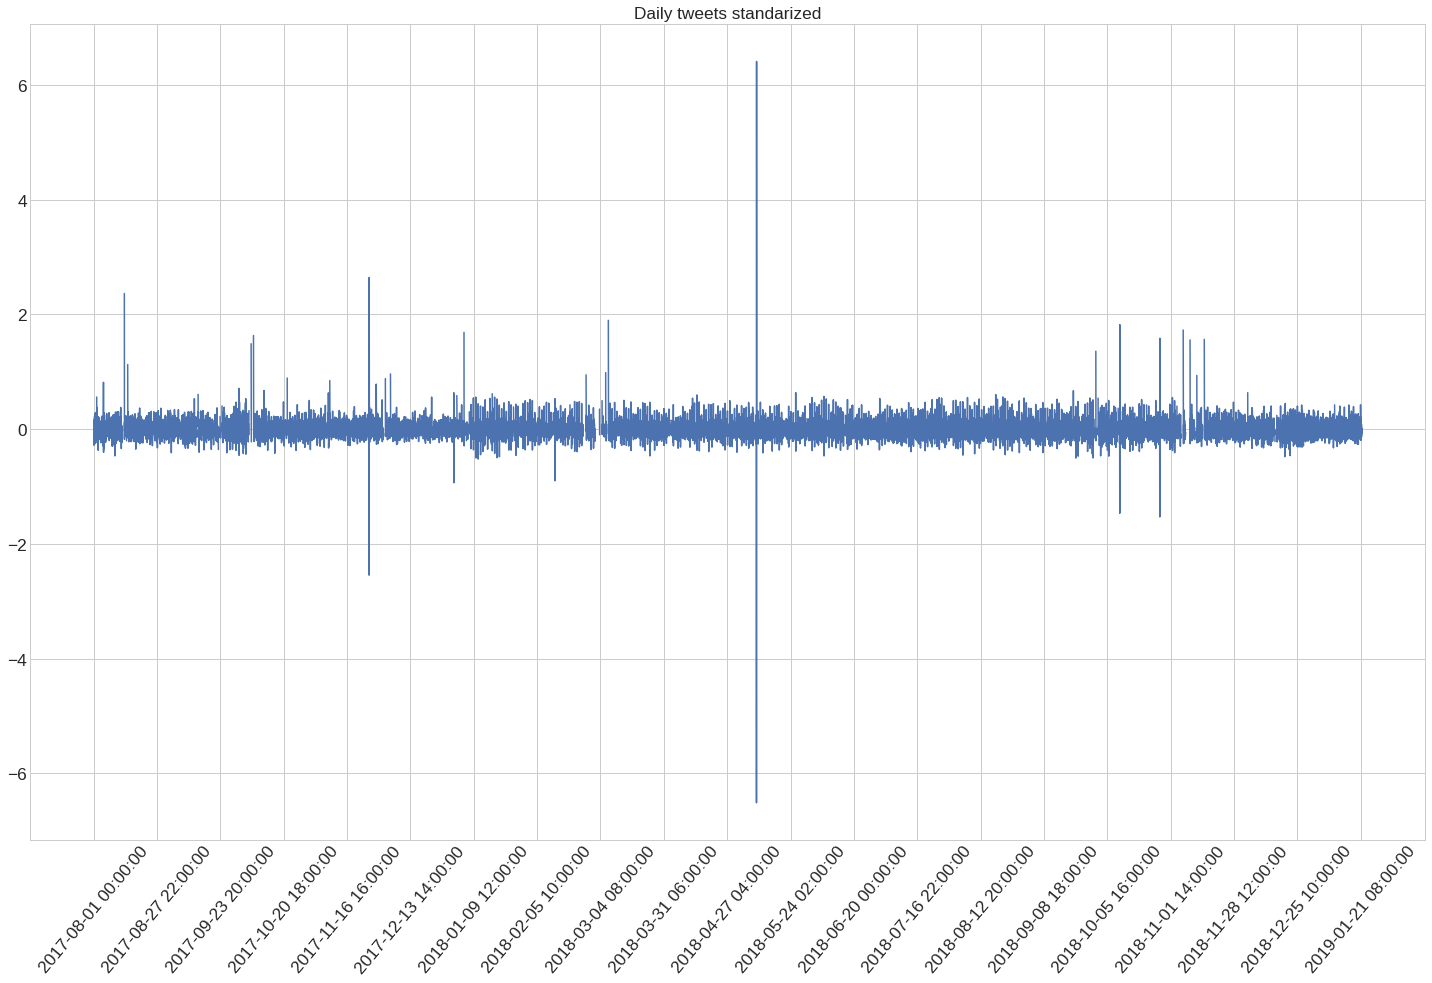

In [9]:
tweets_log_diff = np.log(df['Total Volume of Tweets']).diff()
plt.plot(df['Date'], tweets_log_diff)
plt.title('Daily tweets standarized')
plt.xticks(x_ticks, rotation=50)
plt.show()

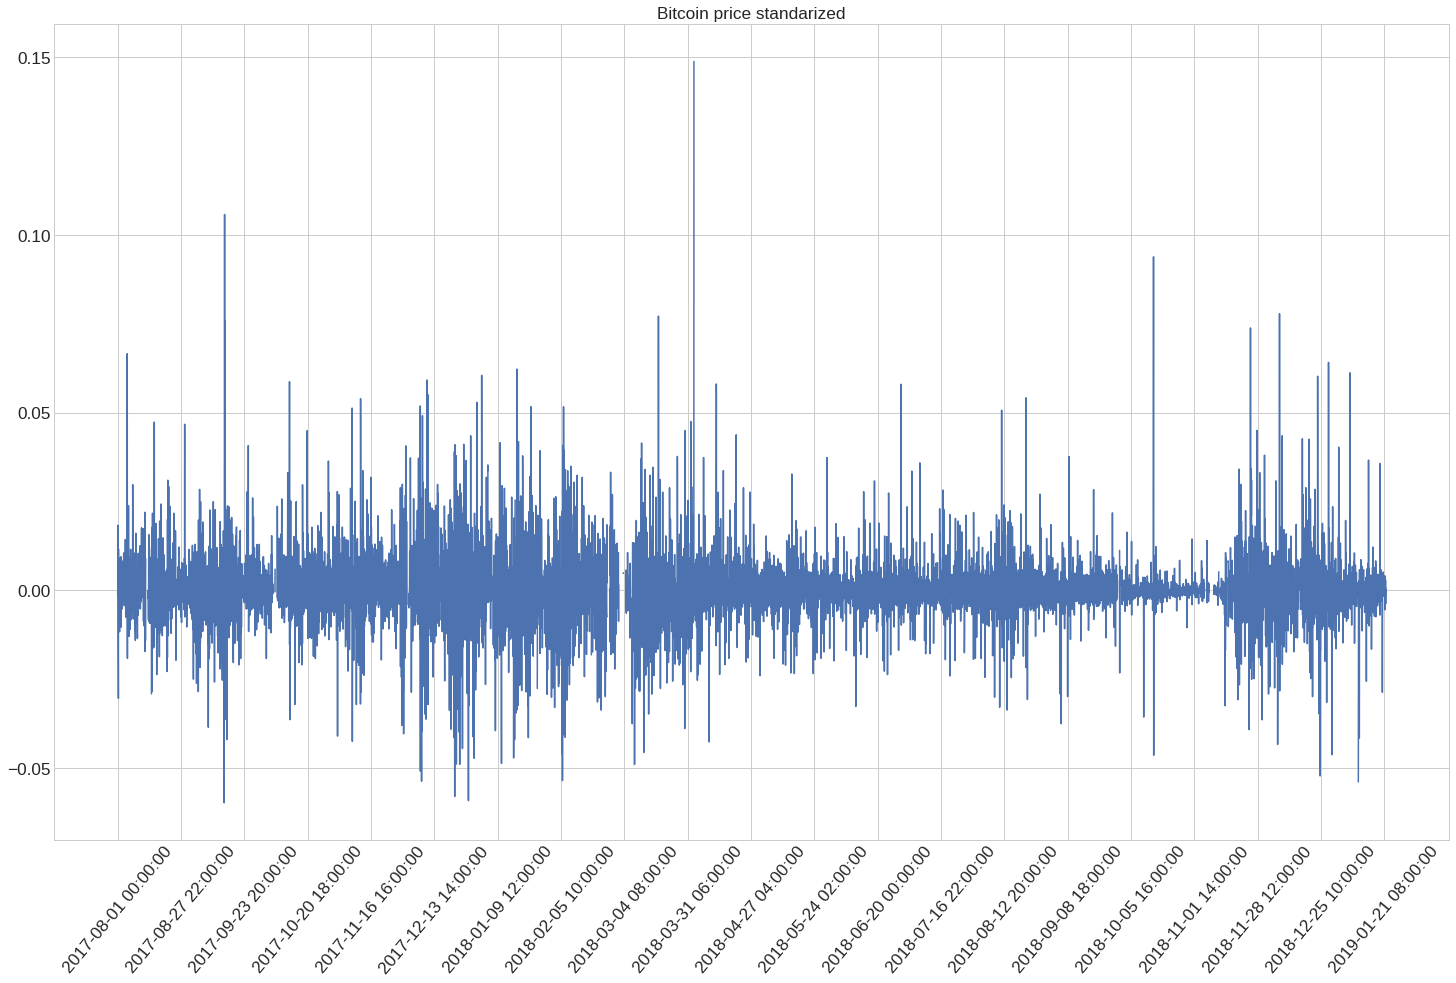

In [10]:
price_log_diff = np.log(df['High']).diff()
plt.plot(df['Date'], price_log_diff)
plt.title('Bitcoin price standarized')
plt.xticks(x_ticks, rotation=50)
plt.show()

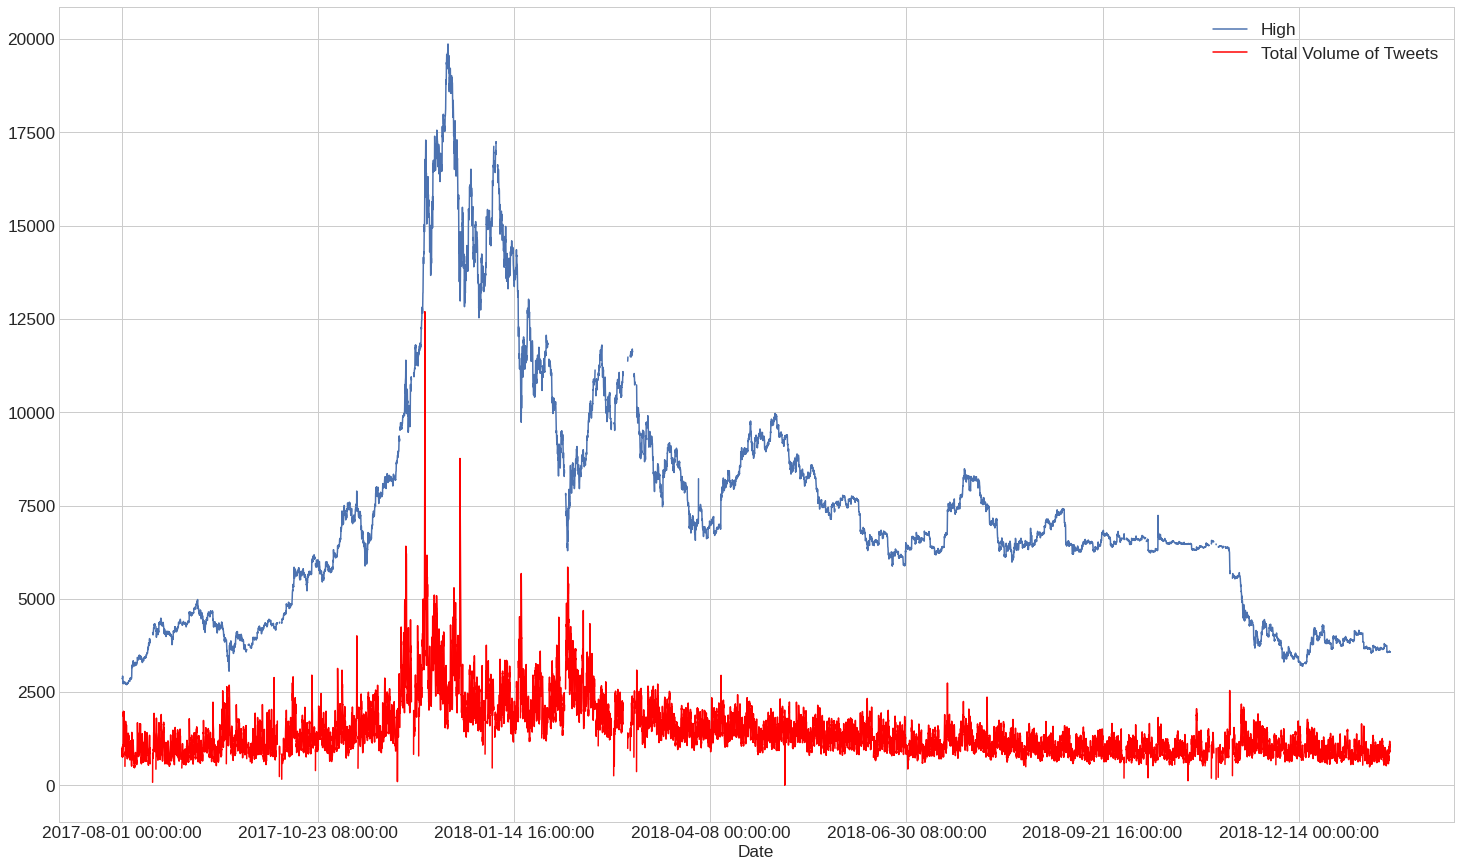

In [11]:
ax = plt.gca()

df.plot(kind='line',x='Date',y='High',ax=ax)
df.plot(kind='line',x='Date',y='Total Volume of Tweets', color='red', ax=ax)

plt.show()

<AxesSubplot:title={'center':'Bitcoin price distribution'}, ylabel='Frequency'>

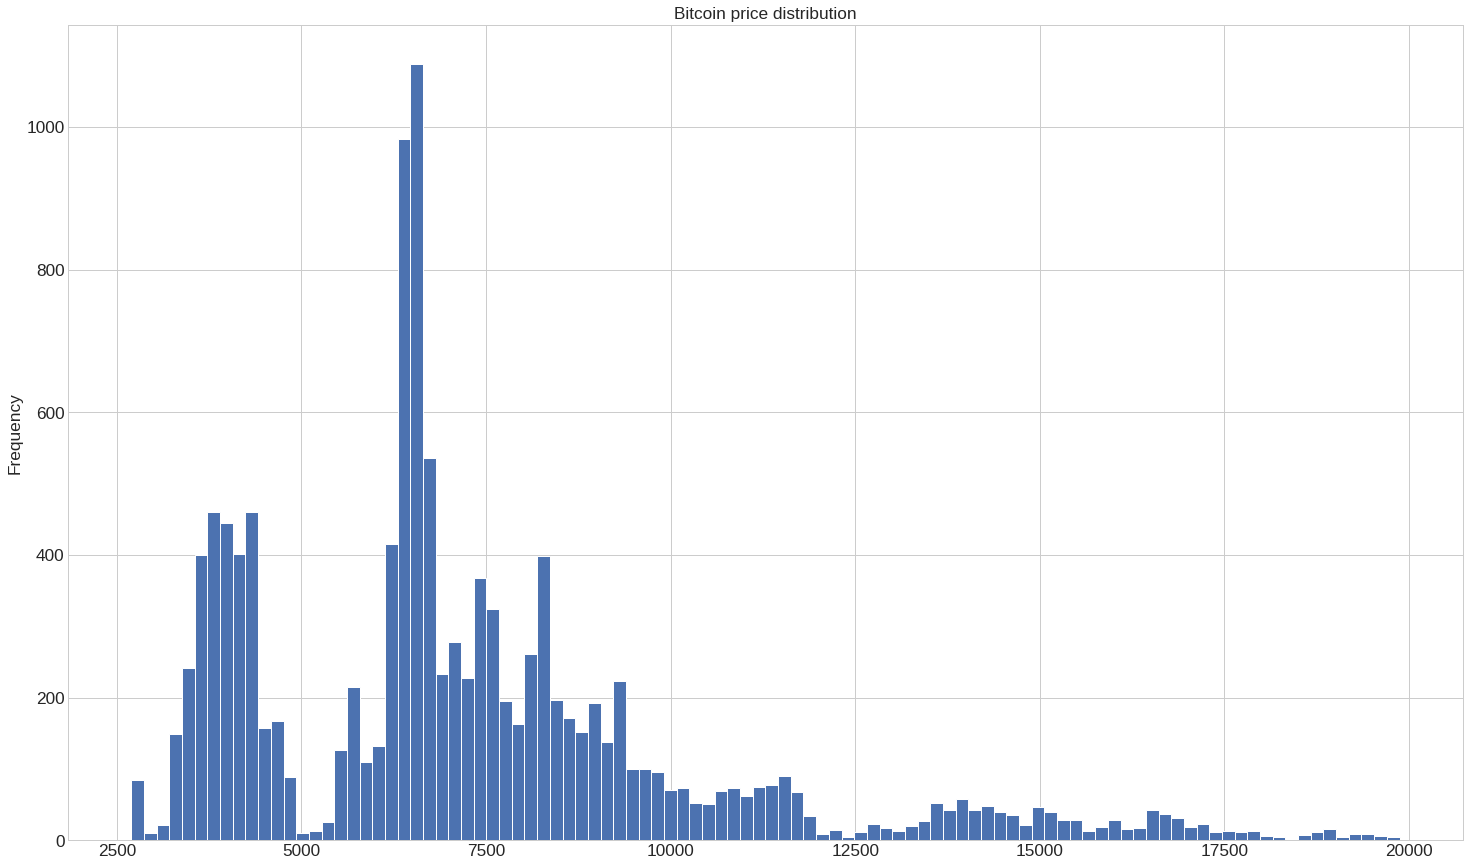

In [12]:
df.High.plot(bins=100, kind='hist',title='Bitcoin price distribution', ylabel='sdfa')

### 4. Detect Outliers

In [13]:
def standarize_data(column):
    new_data = column.copy()
    log_diff = np.log(column).diff() # Y n = Y n - Y n-1
    return log_diff

In [14]:
# function for detecting outliers, it returns indexes
def get_outliers_indexes(column):
    column = standarize_data(column)
    outliers = []
    threshold = 3
    mean_1 = np.mean(column)
    std_1 =np.std(column)
    
    for idx, val in enumerate(column):
        z_score = (val - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(idx)
    return outliers

def get_without_outliers(column1, column2):
    new_column1 = column1.copy()
    new_column2 = column2.copy()
    outliers_indexes = get_outliers_indexes(new_column2)
    for i in sorted(outliers_indexes, reverse=True):
        del new_column1[i]
        del new_column2[i]
    return new_column1, new_column2

def get_without_outliers_standarized(column1, column2):
    new_column1 = column1.copy()
    new_column2 = column2.copy()
    outliers_indexes = get_outliers_indexes(new_column2)
    new_column2 = standarize_data(new_column2)
    for i in sorted(outliers_indexes, reverse=True):
        del new_column1[i]
        del new_column2[i]
    return new_column1, new_column2

def get_only_with_outliers(column1, column2):
    new_column1 = column1.copy()
    new_column2 = column2.copy()
    outliers_indexes = get_outliers_indexes(new_column2)
    col1 = [new_column1[i] for i in outliers_indexes]
    col2 = [new_column2[i] for i in outliers_indexes]
    return col1, col2

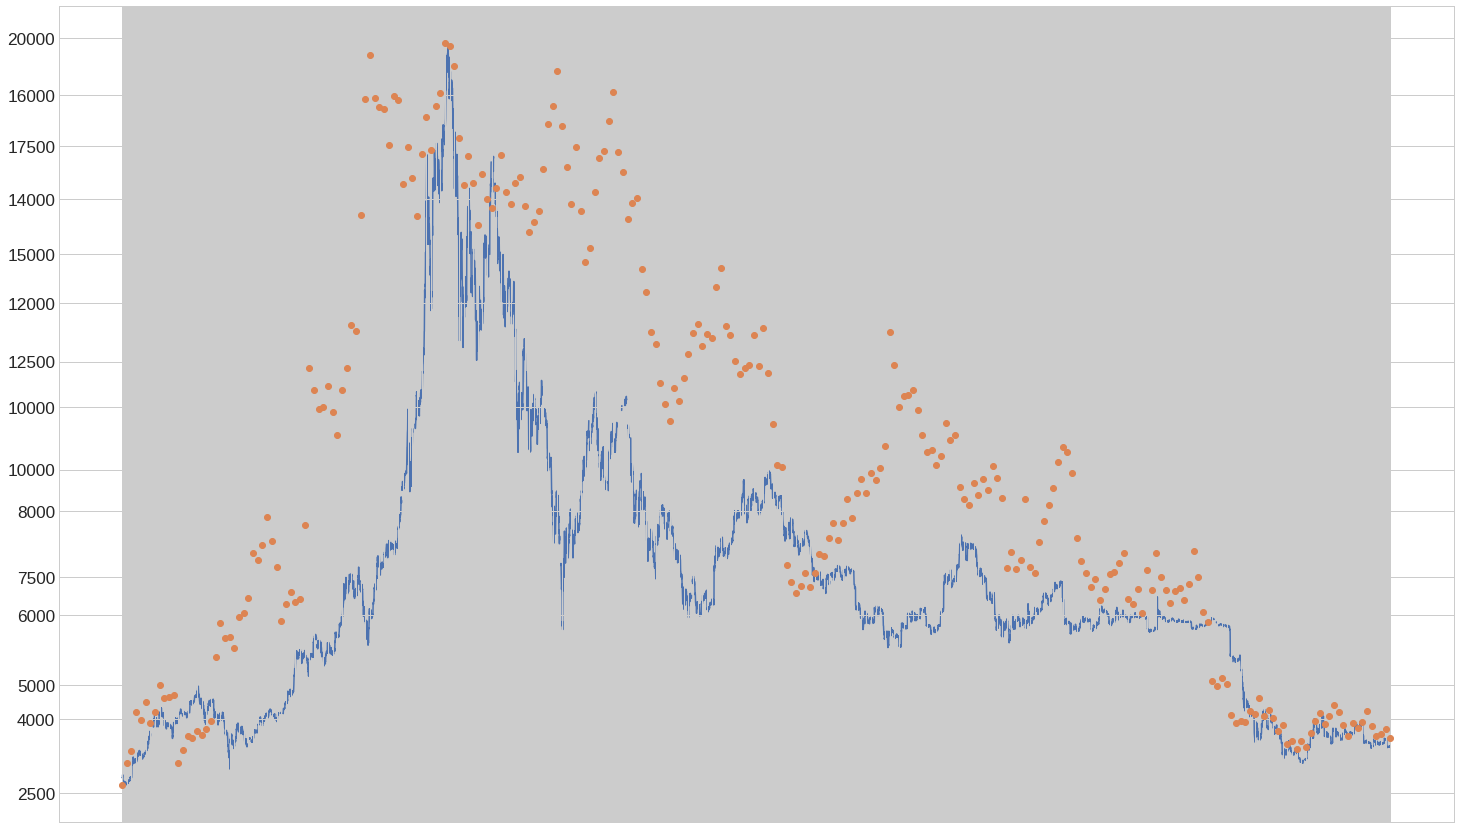

In [15]:
dates, prices = df['Date'], df['High']
new_dates, new_prices = get_without_outliers(dates, prices)
new_dates_outliers, new_prices_outlier = get_only_with_outliers(dates, prices)


fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(new_dates, new_prices, color="C0")
# ax.set_xlabel("x label 1", color="C0")
# ax.set_ylabel("y label 1", color="C0")
# ax.tick_params(axis='x', colors="C0")
# ax.tick_params(axis='y', colors="C0")
ax.set_xticklabels([])
ax2.scatter(new_dates_outliers, new_prices_outlier, color="C1")
ax2.set_xticklabels([])

# ax2.xaxis.tick_top()
# ax2.yaxis.tick_right()
# ax2.set_xlabel('x label 2', color="C1") 
# ax2.set_ylabel('y label 2', color="C1")       
# ax2.xaxis.set_label_position('top') 
# ax2.yaxis.set_label_position('right') 
# ax2.tick_params(axis='x', colors="C1")
# ax2.tick_params(axis='y', colors="C1")

# plt.xticks(new_dates_outliers[0:-1:int(len(new_dates_outliers)/10)], rotation=50)

plt.show()

#### dataset standarized, without outliers

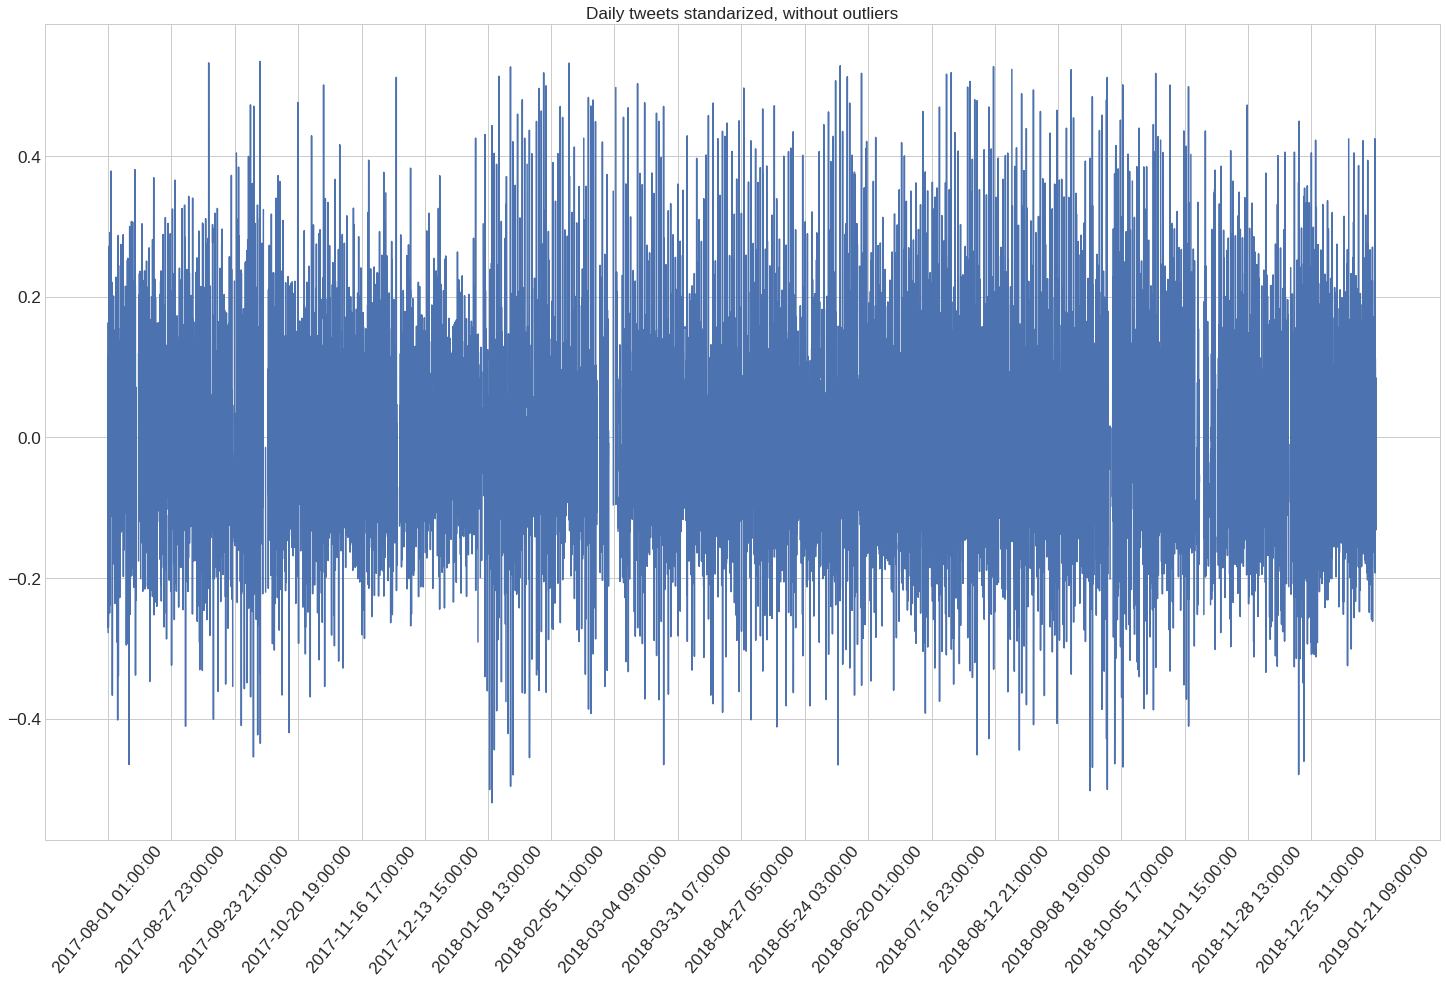

In [16]:
date, tweets = get_without_outliers_standarized(df['Date'], df['Total Volume of Tweets'])
plt.plot(date, tweets)
plt.title('Daily tweets standarized, without outliers')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()

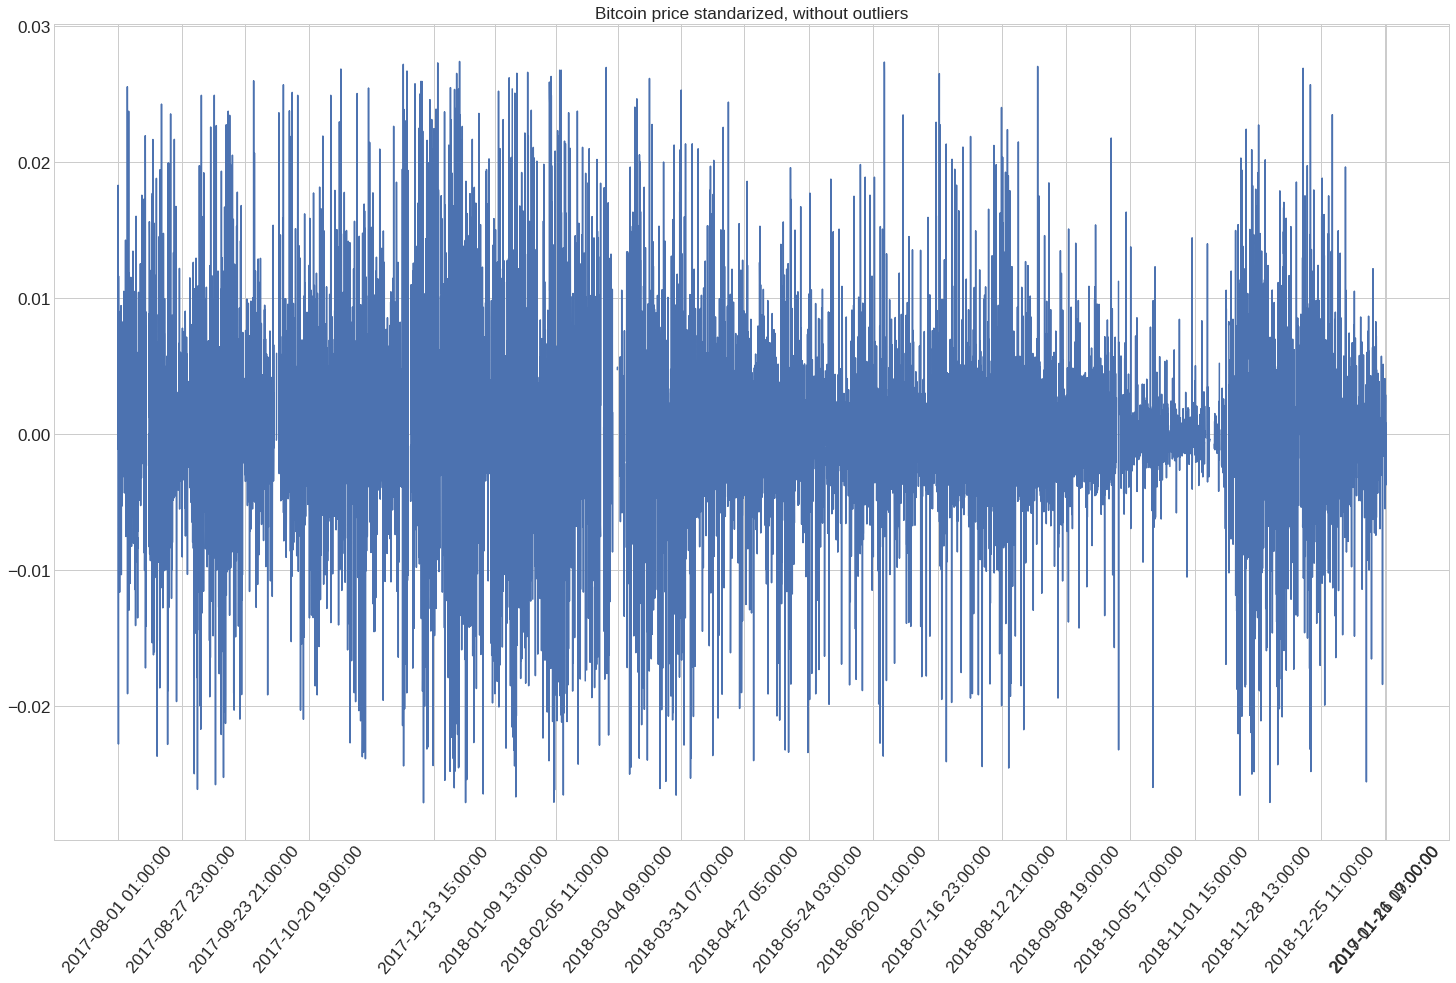

In [17]:
date, tweets = get_without_outliers_standarized(df['Date'], df['High'])
plt.plot(date, tweets)
plt.title('Bitcoin price standarized, without outliers')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()

### 5. Collect statistics - mean, variation, min, max

In [18]:
def find_nan(data):
    nan_indexes = [];
    for i, v in enumerate(data):
        if np.isnan(v):
            nan_indexes.append(i)
    return nan_indexes

def get_statistics(data: pd.Series, column: string, title: string):
    new_data = data[column]
    nans = find_nan(new_data)
    if len(nans) > 0:
        print('Warning! found {} nan values in data series'.format(len(nans)))
    print('Variance: {0:.2f}'.format(np.var(new_data)))
    print('{}:'.format(title))
    print(new_data.describe())

In [19]:
get_statistics(df, 'High', 'Statistics for daily highest market prices')
get_statistics(df, 'Total Volume of Tweets', 'Statistics for daily number of tweets')

Warning! found 578 nan values in data series
Variance: 9791694.59
Statistics for daily highest market prices:
count    12358.000000
mean      7319.294351
std       3129.294967
min       2697.300000
25%       4933.740000
50%       6639.475000
75%       8427.945000
max      19870.620000
Name: High, dtype: float64
Warning! found 578 nan values in data series
Variance: 554726.55
Statistics for daily number of tweets:
count    12358.000000
mean      1435.306603
std        744.829807
min          3.000000
25%        953.000000
50%       1239.000000
75%       1681.000000
max      12696.000000
Name: Total Volume of Tweets, dtype: float64


### 6. Compute correlation coefficient

In [20]:
print(np.ma.corrcoef(np.ma.masked_invalid(df['High']), np.ma.masked_invalid(df['Total Volume of Tweets'])))

[[1.0 0.6459016598326017]
 [0.6459016598326017 1.0]]


In [21]:
df.corr()

,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close
Compound_Score,1.000000,-0.248370,-0.434999,-0.073649,-0.272895,0.215160,0.495808,-0.275327,-0.124859,0.002087,-0.001423,0.006945,0.002701
Total Volume of Tweets,-0.248370,1.000000,0.917488,0.963842,0.963739,-0.054053,-0.163937,0.976627,0.642838,0.640577,0.645902,0.634548,0.640946
Count_Negatives,-0.434999,0.917488,1.000000,0.872717,0.836368,-0.092865,-0.151334,0.878336,0.493422,0.547087,0.553204,0.539861,0.547246
Count_Positives,-0.073649,0.963842,0.872717,1.000000,0.897464,-0.048512,-0.119367,0.930285,0.550811,0.651121,0.656000,0.645888,0.651726
Count_Neutrals,-0.272895,0.963739,0.836368,0.897464,1.000000,-0.016061,-0.207534,0.963239,0.553976,0.584528,0.589791,0.578864,0.585044
Sent_Negatives,0.215160,-0.054053,-0.092865,-0.048512,-0.016061,1.000000,-0.124143,-0.035106,-0.086785,-0.064282,-0.063966,-0.063708,-0.063404
Sent_Positives,0.495808,-0.163937,-0.151334,-0.119367,-0.207534,-0.124143,1.000000,-0.209319,-0.043408,0.039337,0.036661,0.042650,0.039259
Count_News,-0.275327,0.976627,0.878336,0.930285,0.963239,-0.035106,-0.209319,1.000000,0.616460,0.624831,0.629518,0.619717,0.625217
Count_Bots,-0.124859,0.642838,0.493422,0.550811,0.553976,-0.086785,-0.043408,0.616460,1.000000,0.503697,0.505122,0.500832,0.503039
Open,0.002087,0.640577,0.547087,0.651121,0.584528,-0.064282,0.039337,0.624831,0.503697,1.000000,0.999730,0.999616,0.999459


<AxesSubplot:>

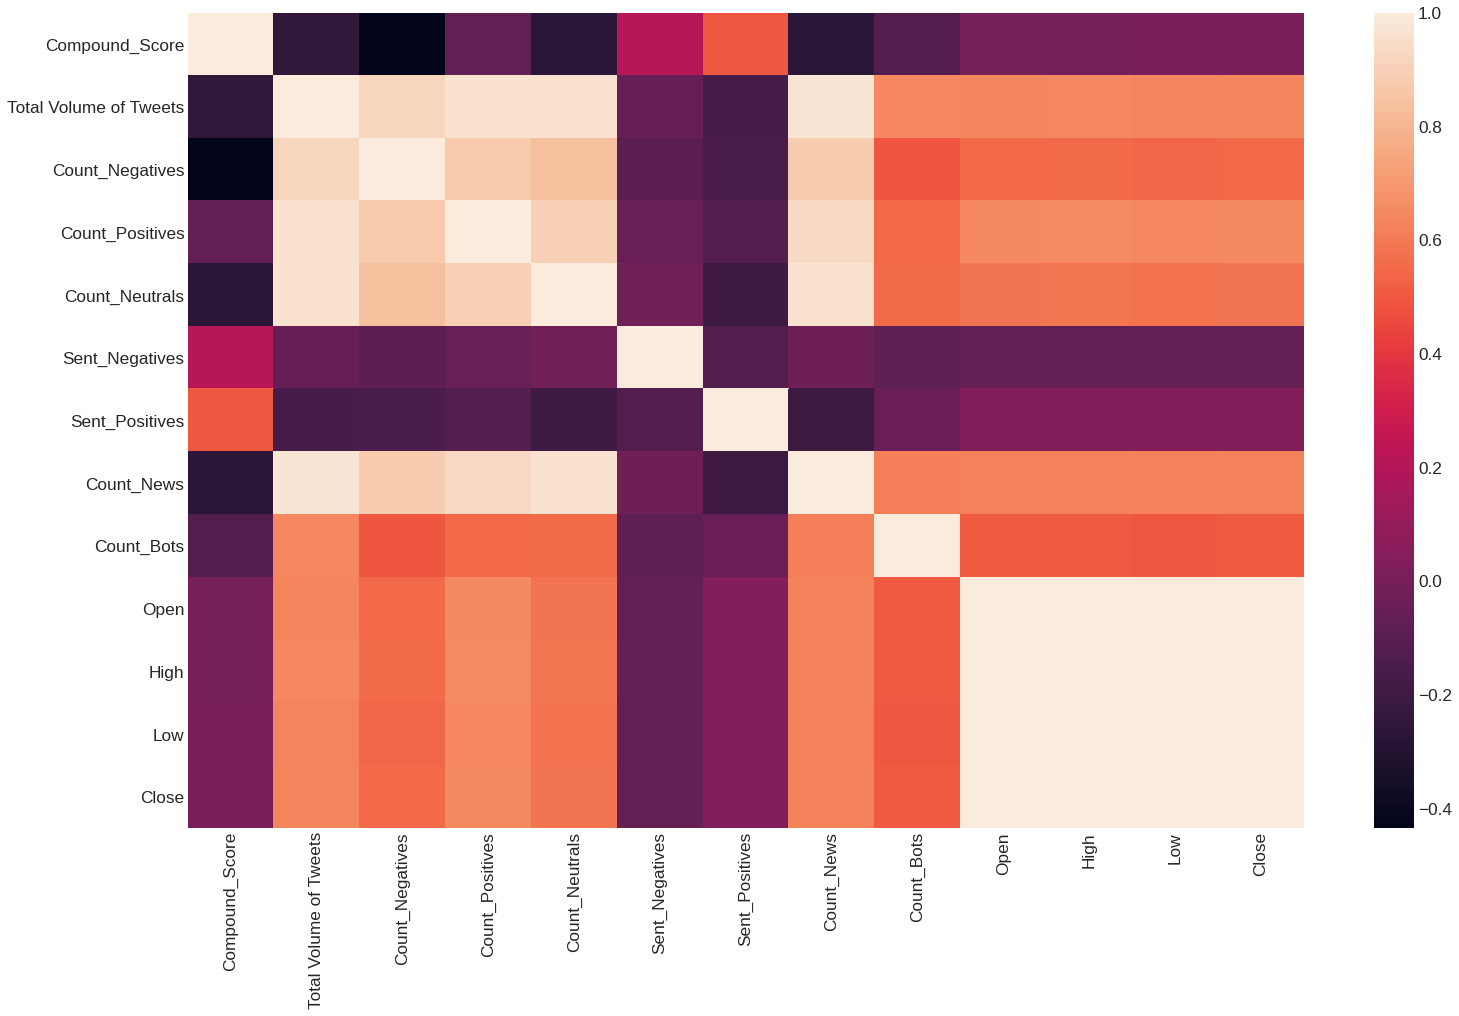

In [22]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


### 7. Most valuable attributes
- bitcoin daily price
- daily volume of tweets

### 8. Data to analysis
- price (hourly)
- tweets (hourly)

### 9. Deal with nan values

#### a) show what is missing 

In [23]:
for column in df:
    try:
        print('Found {} nan values column "{}"'.format(len(find_nan(df[column])), column))
    except TypeError:
        continue

Found 578 nan values column "Compound_Score"
Found 578 nan values column "Total Volume of Tweets"
Found 578 nan values column "Count_Negatives"
Found 578 nan values column "Count_Positives"
Found 578 nan values column "Count_Neutrals"
Found 578 nan values column "Sent_Negatives"
Found 579 nan values column "Sent_Positives"
Found 578 nan values column "Count_News"
Found 578 nan values column "Count_Bots"
Found 578 nan values column "Open"
Found 578 nan values column "High"
Found 578 nan values column "Low"
Found 578 nan values column "Close"


#### b) delete missing records

In [24]:
nan_indexes = find_nan(df['High'])
new_df = df.drop(nan_indexes)
get_statistics(new_df, 'High', 'Statistics for daily highest market prices')

Variance: 9791694.59
Statistics for daily highest market prices:
count    12358.000000
mean      7319.294351
std       3129.294967
min       2697.300000
25%       4933.740000
50%       6639.475000
75%       8427.945000
max      19870.620000
Name: High, dtype: float64


#### c) replace missing values with constant (zero)

In [25]:
new_df = df.fillna(0) # alternatively use df.replace(np.nan, constant)
get_statistics(new_df, 'High', 'Statistics for daily highest market prices')

Variance: 11640914.54
Statistics for daily highest market prices:
count    12936.000000
mean      6992.257235
std       3412.010330
min          0.000000
25%       4398.232500
50%       6585.735000
75%       8323.770000
max      19870.620000
Name: High, dtype: float64


#### d) fill nan with mean

In [26]:
mean_tweets = np.mean(df['Total Volume of Tweets'])
print('Mean: {}'.format(mean_tweets))
new_df = df.replace(np.nan, mean_tweets)
get_statistics(new_df, 'Total Volume of Tweets', 'Statistics for daily number of tweets')

Mean: 1435.3066030101959
Variance: 529940.53
Statistics for daily number of tweets:
count    12936.000000
mean      1435.306603
std        727.998283
min          3.000000
25%        966.000000
50%       1272.000000
75%       1653.000000
max      12696.000000
Name: Total Volume of Tweets, dtype: float64


### 10.

#### a) Normalization [-1, 1]

In [27]:
def plot_scaled_column(data_x: pd.Series, data_y: pd.Series, plot_title):
    scaler = MinMaxScaler()
    normalized_df = scaler.fit_transform(data_y.values.reshape(-1, 1))
    step = int(len(normalized_df) / 20)
    plt.plot(data_x, normalized_df)
    plt.title(plot_title)
    plt.xticks(data_x[0:-1:step], rotation=50)
    plt.show()

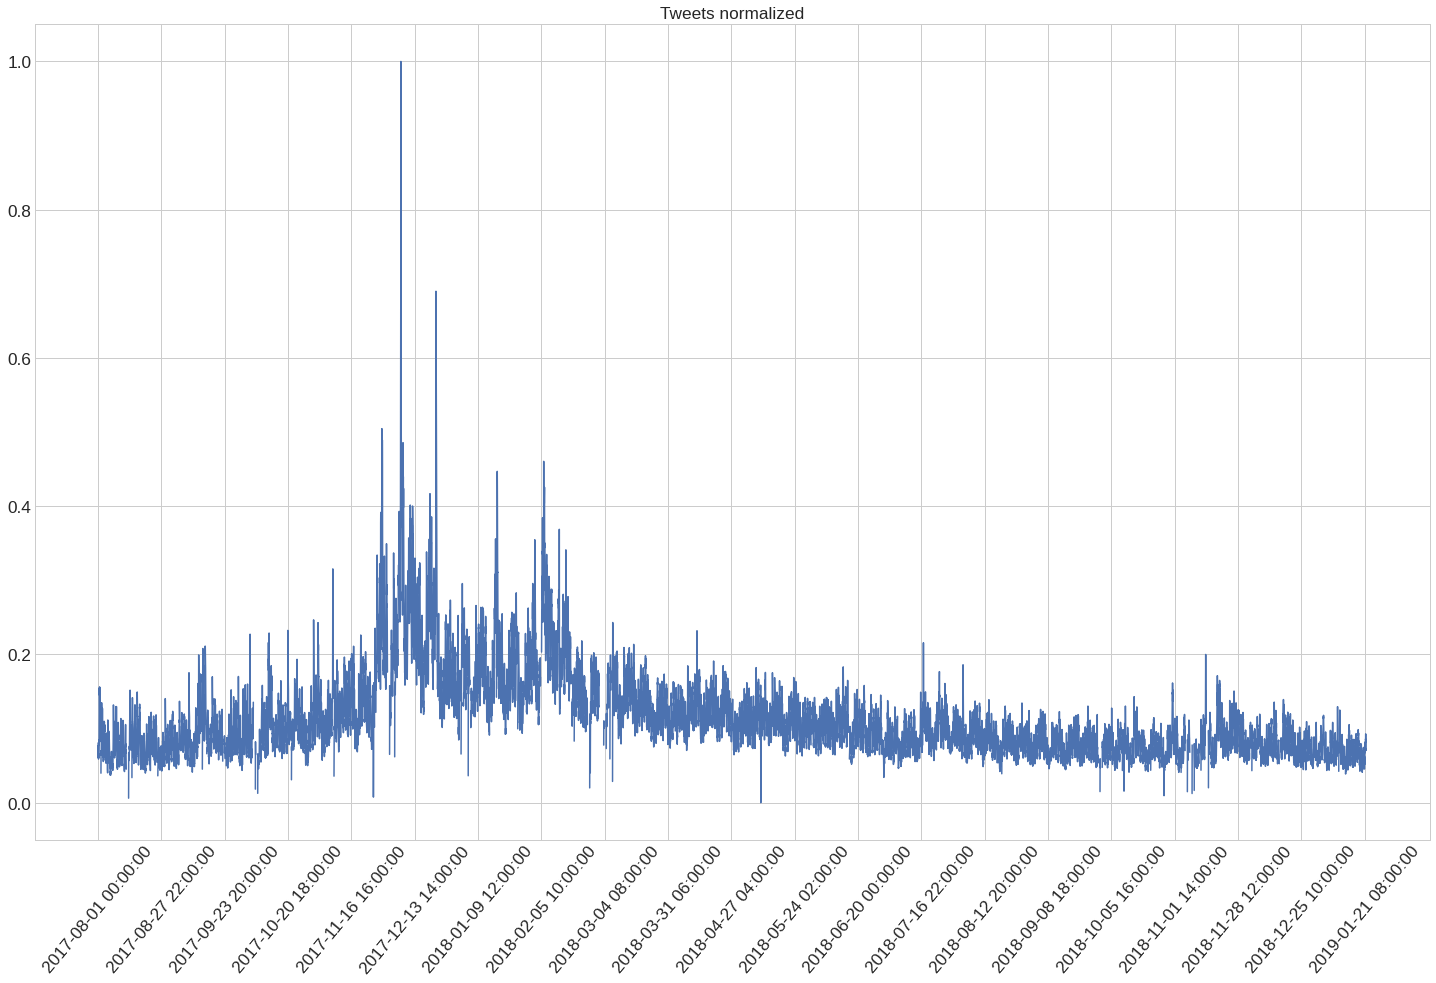

In [28]:
plot_scaled_column(df['Date'], df['Total Volume of Tweets'], 'Tweets normalized')

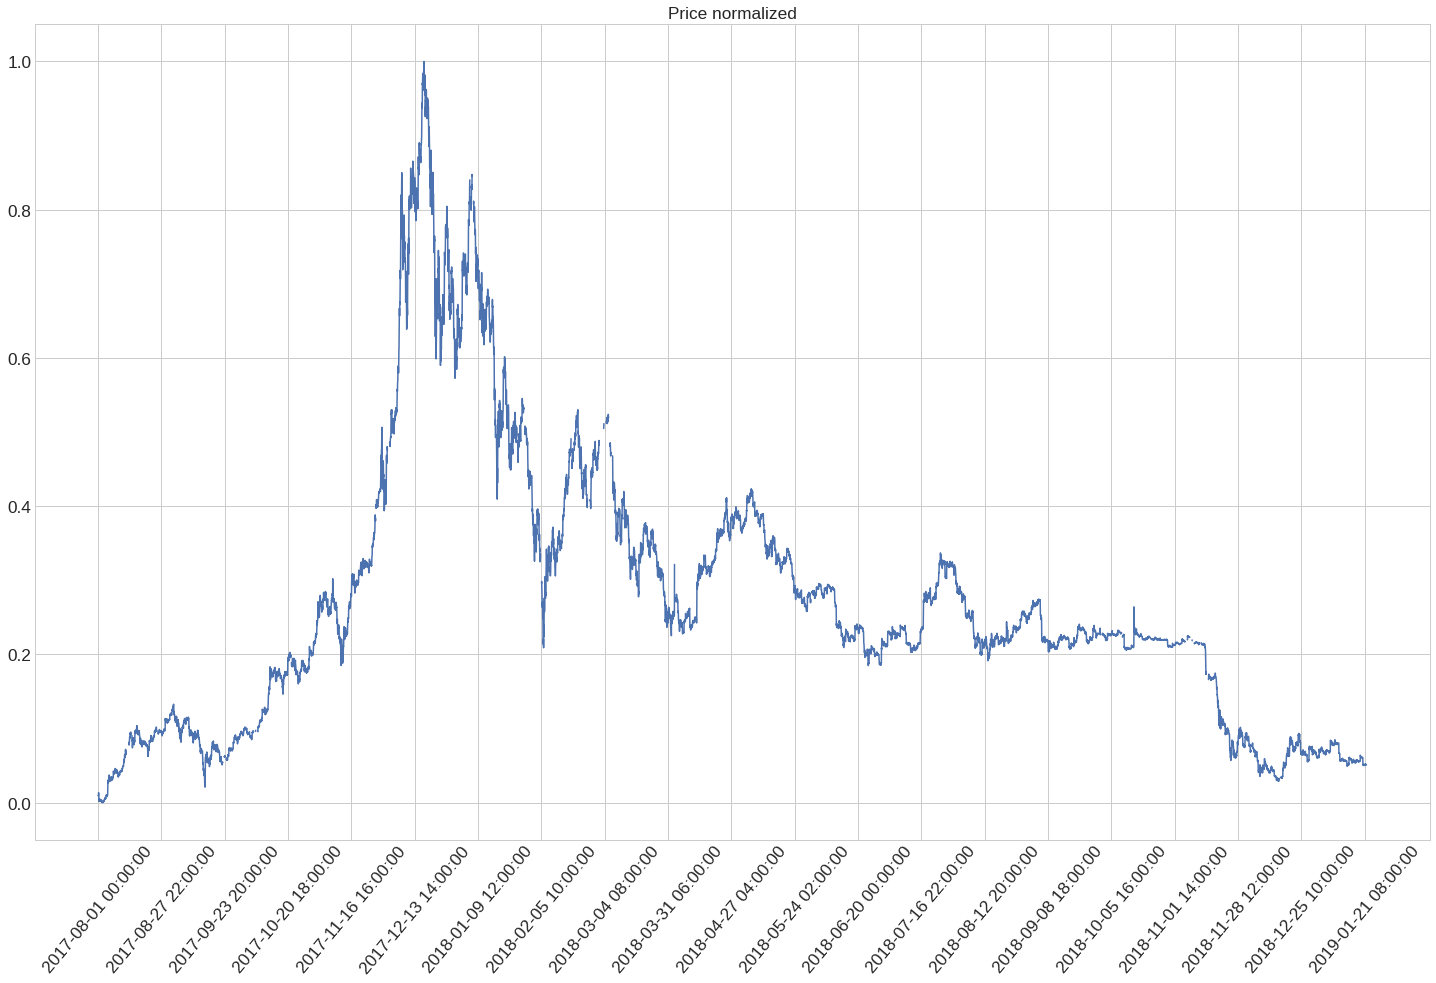

In [29]:
plot_scaled_column(df['Date'], df['High'], 'Price normalized')

#### b) Gauss distribution (0, 1)

<AxesSubplot:ylabel='Density'>

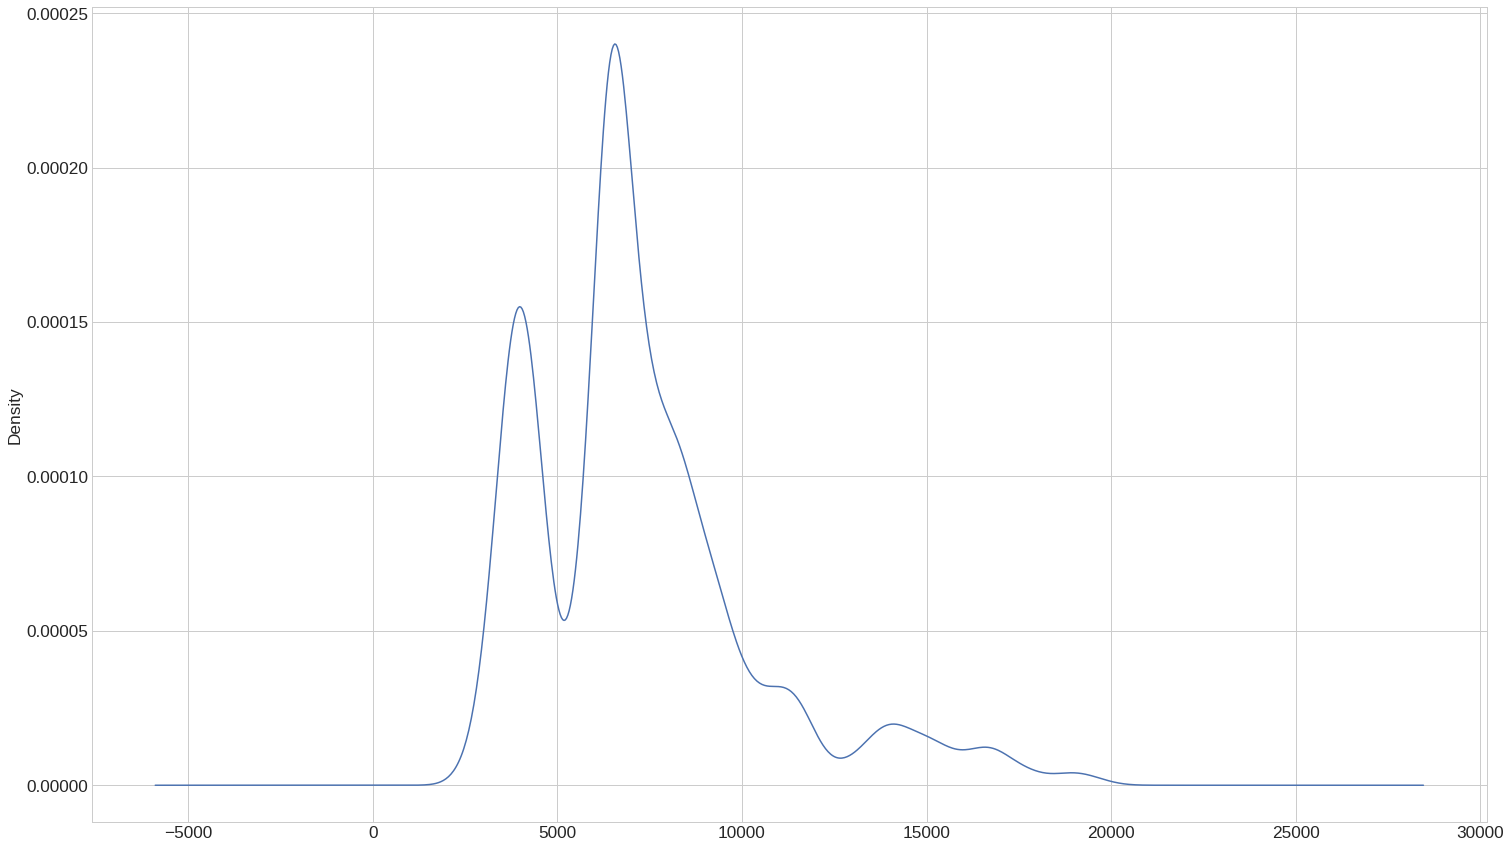

In [30]:
df['High'].plot.kde()

<AxesSubplot:ylabel='Density'>

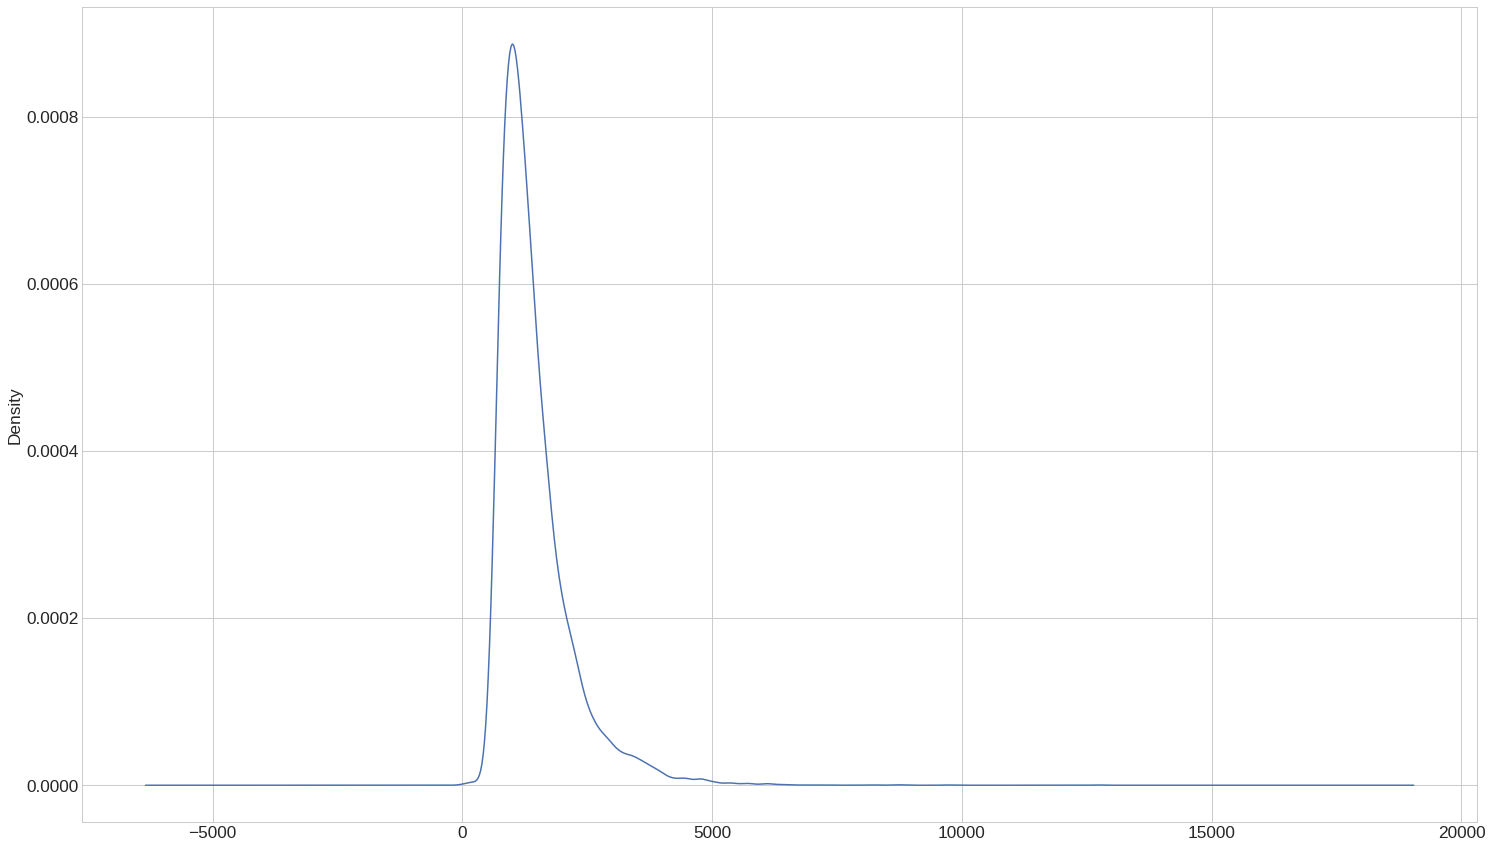

In [31]:
df['Total Volume of Tweets'].plot.kde()